In [81]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [82]:
dev = qml.device("default.qubit", wires=12)

In [83]:
def deustsch(Uf, wires):
    assert len(wires) == 2
    assert Uf.shape == (2,2)
    qml.X(wires=wires[1])
    [qml.Hadamard(wires=[wire]) for wire in wires]
    qml.ControlledQubitUnitary(Uf, control_wires=wires[0], wires=wires[1])
    qml.Hadamard(wires=wires[0])

In [84]:
def begin(Ufs):
    deustsch(np.array(Ufs[0]), wires=[0,1])
    deustsch(np.array(Ufs[1]), wires=[2,3])
    deustsch(np.array(Ufs[2]), wires=[4,5])
    
def And(wires, beginIndex):
    idx = beginIndex
    lastWire = wires[0]
    remainingWires = wires[1:]
    for wire in remainingWires:
        qml.Toffoli(wires=[lastWire, wire, idx])
        lastWire = idx
        idx += 1
    return lastWire

def Or(wires, beginIndex):
    idx = beginIndex
    lastWire = wires[0]
    remainingWires = wires[1:]
    [qml.X(wire) for wire in wires]
    for wire in remainingWires:
        qml.Toffoli(wires=[lastWire, wire, idx])
        lastWire = idx
        idx += 1
    qml.X(wires=[lastWire])
    return lastWire
    
def atLeastOneBalanced(Ufs):
    assert len(Ufs) == 3
    begin(Ufs)
    res = Or(wires=[0,2,4], beginIndex=6)
    return qml.probs(wires=[res])

def allBalanced(Ufs):
    assert len(Ufs) == 3
    begin(Ufs)
    res = And(wires=[0,2,4], beginIndex=6)
    return qml.probs(wires=[res])

def sumBalanced(Ufs):
    assert len(Ufs) == 3
    begin(Ufs)
    A = 0
    B = 2
    C = 4
    S = 6
    [qml.CNOT(wires=[wire,S]) for wire in [A,B,C]] # XOR A,B,C
    AandB = And(wires=[A,B], beginIndex=7)
    BandC = And(wires=[B,C], beginIndex=AandB+1)
    AandC = And(wires=[A,C], beginIndex=BandC+1)
    Cr = Or(wires=[AandB,BandC,AandC], beginIndex=AandC+1)
    return qml.probs(wires=[Cr,S])

isAtLeastOneBalanced = qml.QNode(atLeastOneBalanced, dev)
areAllBalanced = qml.QNode(allBalanced, dev)
getSumBalanced = qml.QNode(sumBalanced, dev)

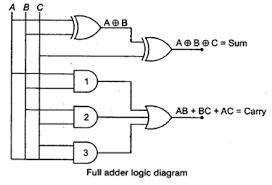

In [85]:
X = np.array([
    [0,1],
    [1,0]
])
I = np.eye(2)

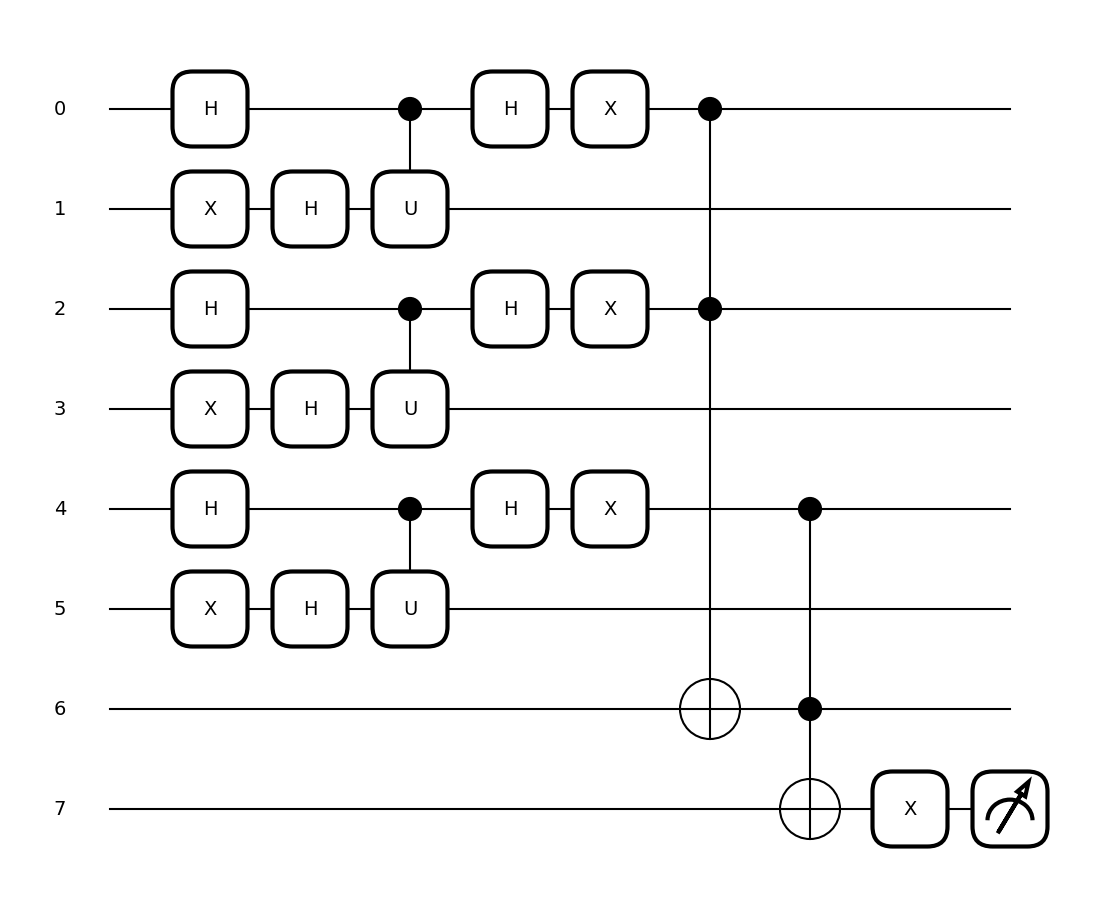

In [86]:
fig, ax = qml.draw_mpl(isAtLeastOneBalanced)([X,I,I])
plt.show()

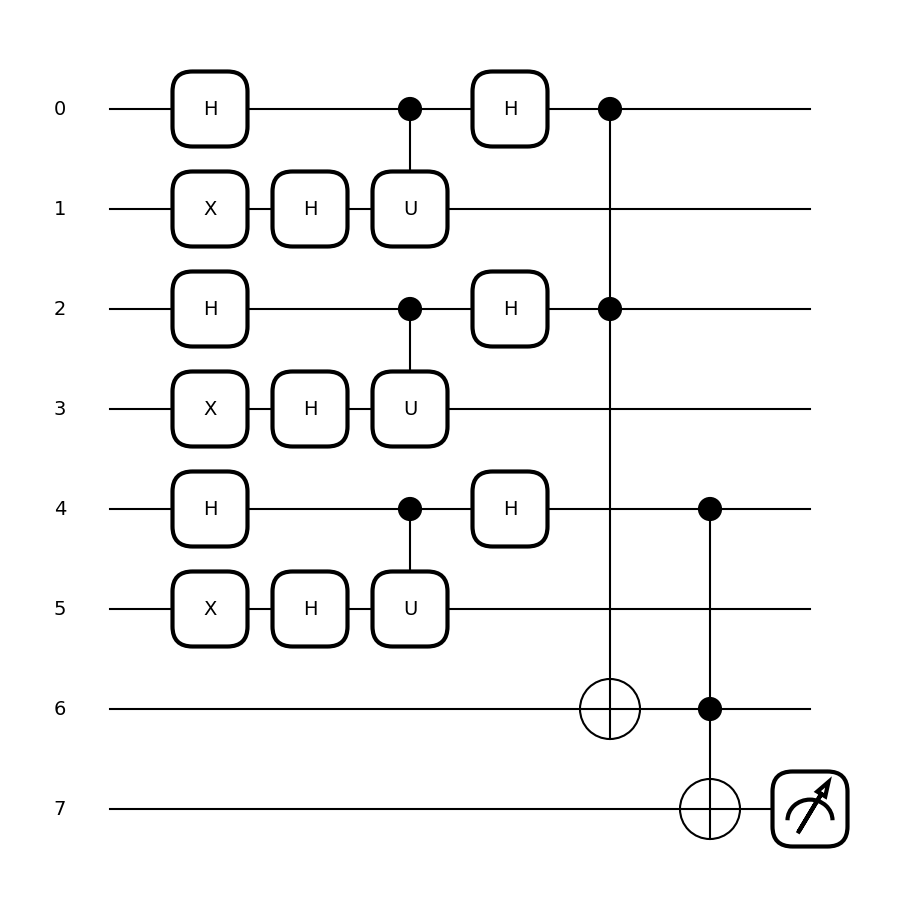

In [87]:
fig, ax = qml.draw_mpl(areAllBalanced)([X,I,I])
plt.show()

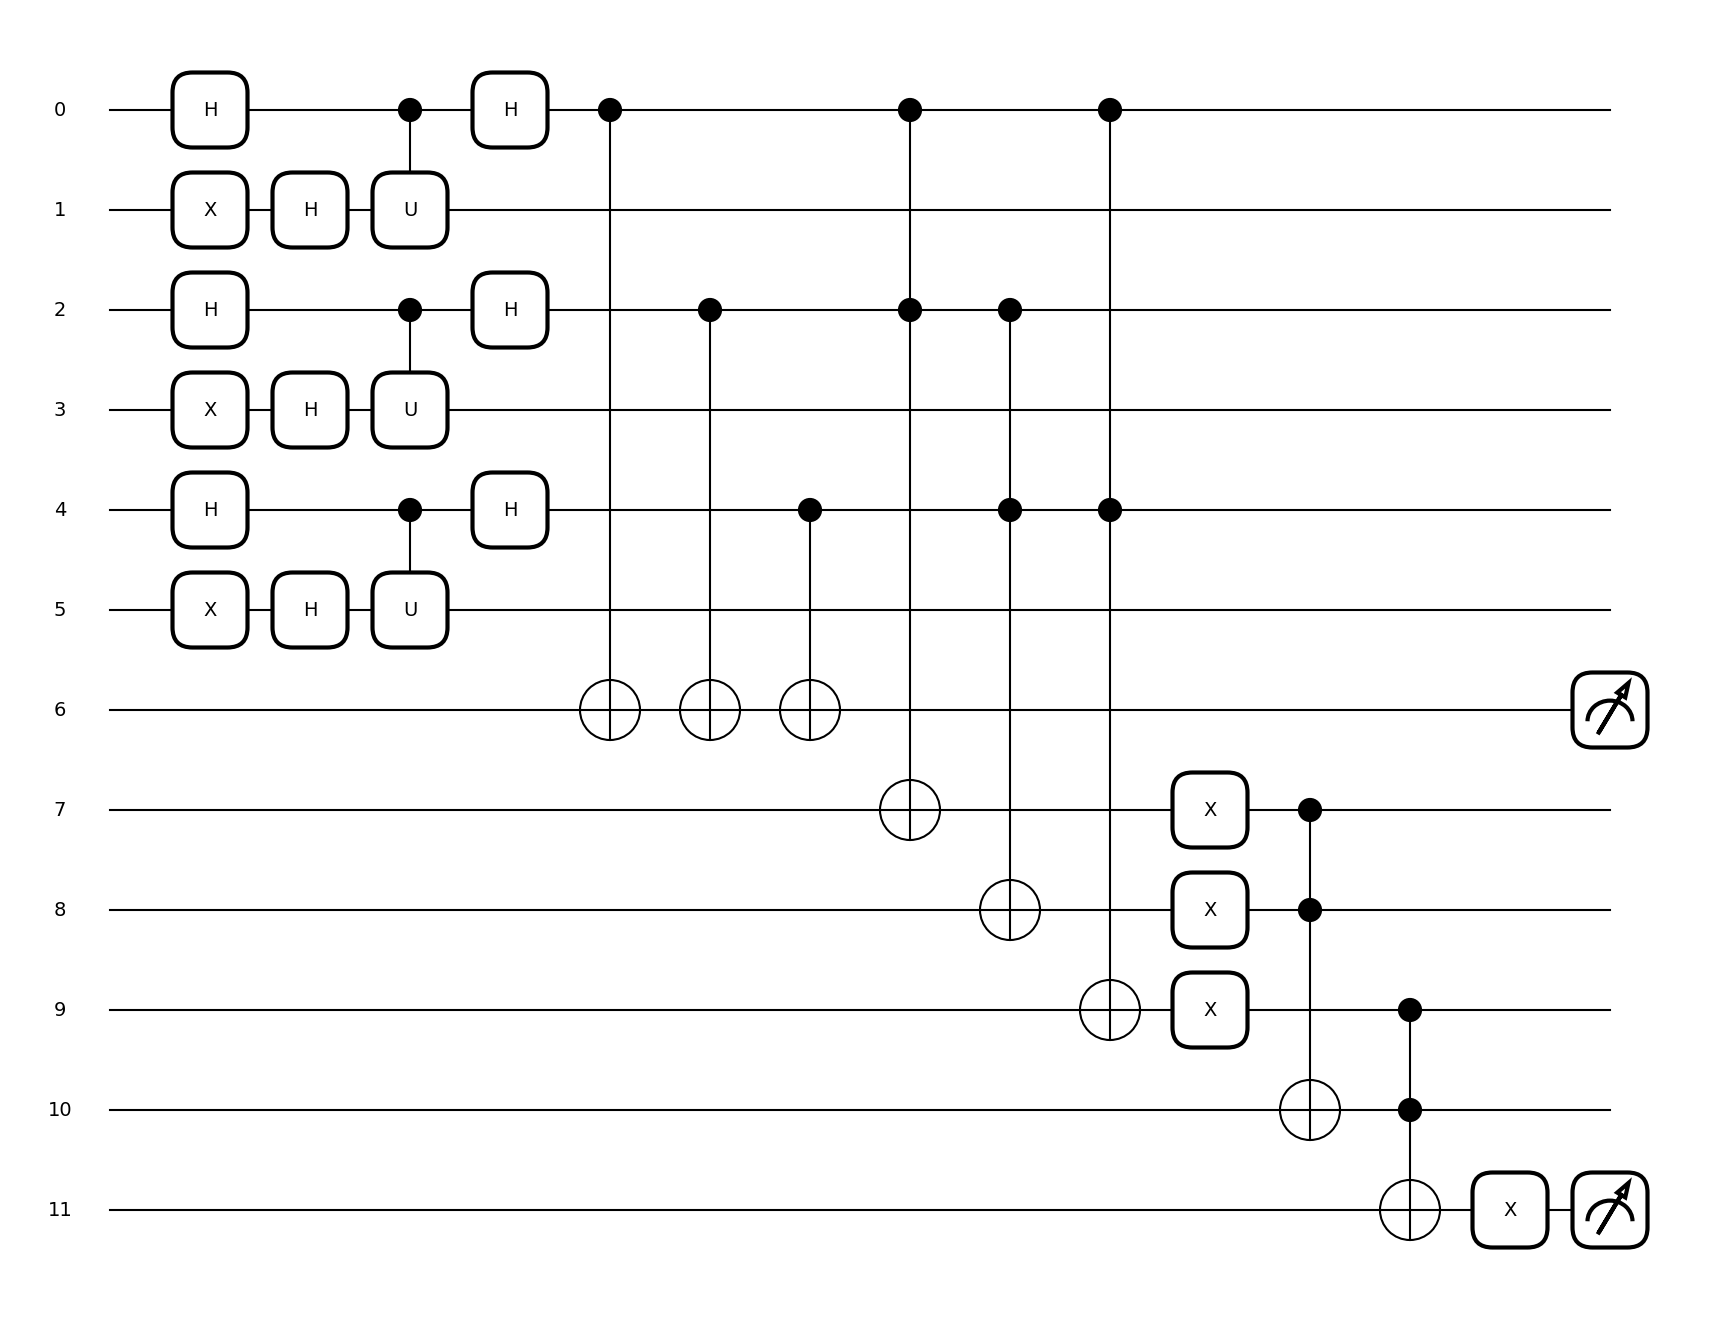

In [88]:
fig, ax = qml.draw_mpl(getSumBalanced)([X,I,I])
plt.show()

In [89]:
isAtLeastOneBalanced([I,I,I])

tensor([1., 0.], requires_grad=True)

In [90]:
areAllBalanced([X,X,X])

tensor([0., 1.], requires_grad=True)

In [102]:
getSumBalanced([X,I,X])

tensor([0., 0., 1., 0.], requires_grad=True)